<a href="https://colab.research.google.com/github/abhi-11nav/Convolution_NN-Implementation/blob/main/mnist_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing pandas and numpy library

import pandas as pd
import numpy as np

In [ ]:
# Chekcking for GPU type 
!nvidia-smi

Tue Jun 21 19:44:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf 
from tensorflow import keras 

In [ ]:
dataset = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
(train_X,train_y),(test_X,test_y) = dataset

In [ ]:
print(train_X.shape,"\n",train_y.shape,"\n",test_X.shape,"\n",test_y.shape)

(50000, 32, 32, 3) 
 (50000, 1) 
 (10000, 32, 32, 3) 
 (10000, 1)


In [ ]:
# Importing Library for Data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential

In [ ]:
from functools import partial 

In [ ]:
default_conv2d = partial(tf.keras.layers.Conv2D, kernel_size=9, activation="relu", padding="SAME")

In [ ]:
model = tf.keras.models.Sequential([
default_conv2d(filters=64,kernel_size=7,input_shape=[32,32,3]),
keras.layers.MaxPooling2D(pool_size=2),
default_conv2d(filters=128),
default_conv2d(filters=128),
keras.layers.MaxPooling2D(pool_size=2),
default_conv2d(filters=256),
default_conv2d(filters=256),
keras.layers.MaxPooling2D(pool_size=2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(256, activation="relu"),
keras.layers.Dense(10,activation="softmax")])

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.build(train_X.shape)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       663680    
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       1327232   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 256)        

In [ ]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.35)

In [ ]:
history = model.fit(train_X,train_y,epochs=40,validation_data=[valid_X,valid_y])

Epoch 1/40
430/430 [==============================] - 13s 30ms/step - loss: 1.2271 - accuracy: 0.5630 - val_loss: 1.6359 - val_accuracy: 0.4512
Epoch 2/40
430/430 [==============================] - 13s 31ms/step - loss: 1.1967 - accuracy: 0.5744 - val_loss: 1.6132 - val_accuracy: 0.4697
Epoch 3/40
430/430 [==============================] - 13s 30ms/step - loss: 1.1484 - accuracy: 0.5928 - val_loss: 1.6412 - val_accuracy: 0.4348
Epoch 4/40
430/430 [==============================] - 13s 30ms/step - loss: 1.1217 - accuracy: 0.6062 - val_loss: 1.8627 - val_accuracy: 0.4291
Epoch 5/40
430/430 [==============================] - 13s 30ms/step - loss: 1.0842 - accuracy: 0.6201 - val_loss: 1.7777 - val_accuracy: 0.4535
Epoch 6/40
430/430 [==============================] - 13s 30ms/step - loss: 1.0422 - accuracy: 0.6370 - val_loss: 1.7870 - val_accuracy: 0.4624
Epoch 7/40
430/430 [==============================] - 13s 30ms/step - loss: 0.9422 - accuracy: 0.6748 - val_loss: 1.7302 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

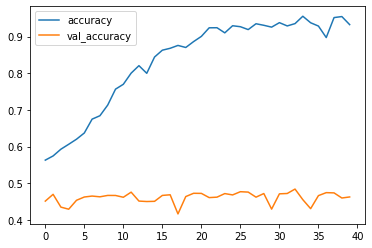

In [ ]:
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()

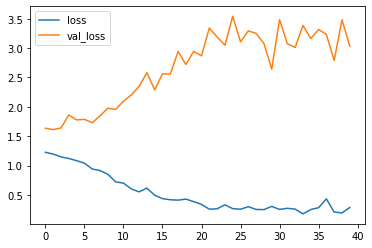

In [ ]:
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()

In [ ]:
model.evaluate([test_X,test_y])

ValueError: ignored